In [1]:
import os

In [2]:
os.chdir("/Users/bsriram/datasci/28jul/lab")

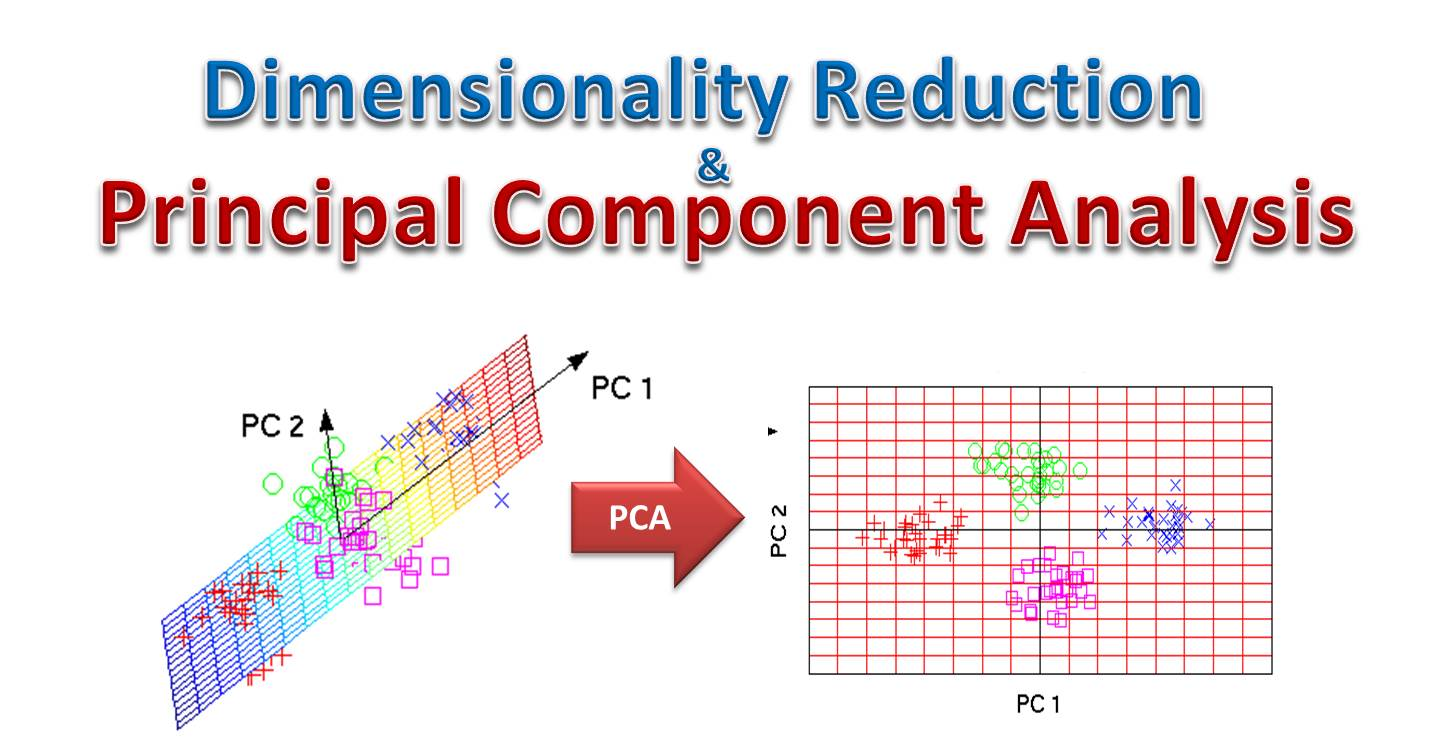

In [3]:
from IPython.display import Image

Image(filename='pca_title.jpg')



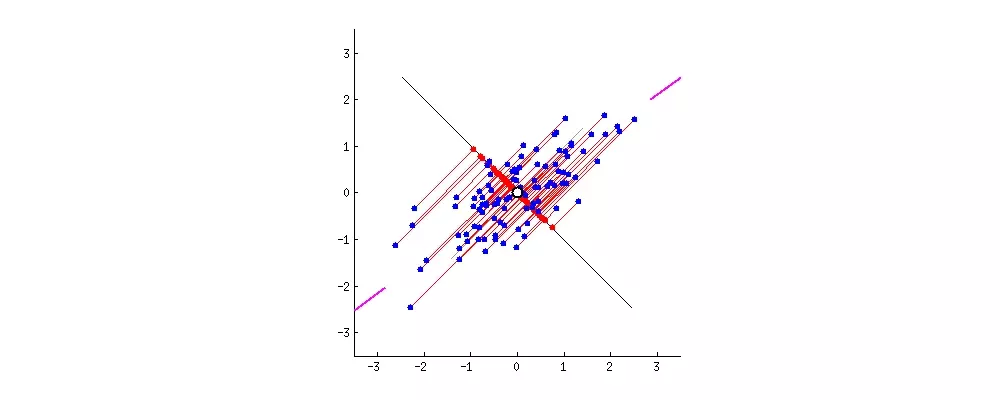

In [4]:
Image(filename='pca_anime.gif')

# I. PCA APPROACH

1. Standardize the data.

2. Obtain the Eigenvectors and Eigenvalues from the covariance matrix or correlation matrix, or perform Singular Vector Decomposition.

3. Sort eigenvalues in descending order and choose the k eigenvectors that correspond to the k largest eigenvalues where k is the number of dimensions of the new feature subspace (k≤d)/.

4. Construct the projection matrix W from the selected k eigenvectors.

5. Transform the original dataset X via W to obtain a k-dimensional feature subspace Y.

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [6]:
df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']

print(df.isnull().values.any())

df.dropna(how="all", inplace=True) # drops the empty line at file-end

#Have to assign back to dataframe as it is a copy
#df = df.some_operation(inplace=False) 
# No need to assign back to dataframe
#df.some_operation(inplace=True)

df.tail()

False


,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
X = df.ix[:,0:4].values
y = df.ix[:,4].values

/Users/bsriram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/Users/bsriram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Our iris dataset is now stored in form of a 150×4 matrix where the columns are the different features, and every row represents a separate flower sample. Each sample row x can be pictured as a 4-dimensional vector

## 1. Standardize

i. Whether to standardize the data prior to a PCA on the covariance matrix depends on the measurement scales of the original features.


ii. Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales.

iii. Although, all features in the Iris dataset were measured in centimeters, let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.

In [8]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

## 2. Eigendecomposition - Computing Eigenvectors and Eigenvalues

The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the "core" of a PCA: 
    
    i. The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. 
    
    ii. In other words, the eigenvalues explain the variance of the data along the new feature axes.

### 2.1 Covariance Matrix

The classic approach to PCA is to perform the eigen decomposition on the covariance matrix Σ, which is a d×d matrix where each element represents the covariance between two features. 

In [9]:
import numpy as np
#mean_vec = np.mean(X_std, axis=0)
#cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
#print('Covariance matrix \n%s' %cov_mat)
print('Covariance matrix \n')
cov_mat= np.cov(X_std, rowvar=False)
cov_mat

Covariance matrix 



array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

### 2.2 Eigendecomposition on the covariance matrix

In [10]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)



Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


NOTE: EIGEN VALUE AND EIGEN VECTOR PAIRS CAN BE OBTAINED THROUGH A CORRELATION MATRIX TOO

### 2.3 Eigen Vectors verification

In [11]:
sq_eig=[]
for i in eig_vecs:
    sq_eig.append(i**2)
 

print(sq_eig)
sum(sq_eig)

print("sum of squares of each values in an  eigen vector is \n", 0.27287211+ 0.13862096+0.51986524+ 0.06864169)

for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('\n\nEverything ok!')



[array([0.27287211, 0.13862096, 0.51986524, 0.06864169]), array([0.06935581, 0.85665482, 0.05857991, 0.01540945]), array([3.37856219e-01, 4.44989610e-04, 1.98506285e-02, 6.41848163e-01]), array([0.31991586, 0.00427922, 0.40170422, 0.2741007 ])]
sum of squares of each values in an  eigen vector is 
 1.0


Everything ok!


## 3. Selecting Principal Components

i. The typical goal of a PCA is to reduce the dimensionality of the original feature space by projecting it onto a smaller subspace, where the eigenvectors will form the axes. 

ii. However, the eigenvectors only define the directions of the new axis, since they have all the same unit length 1, which can confirmed by the following two lines of code:

### 3.1 Sorting eigen values
In order to decide which eigenvector(s) can dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues:

i. The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.

ii. In order to do so, the common approach is to rank the eigenvalues from highest to lowest in order choose the top k eigenvectors.

In [12]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print(type(eig_pairs))


# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()


print("\n",eig_pairs)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('\n\n\nEigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])


<class 'list'>

 [(2.9303537755893174, array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])), (0.9274036215173421, array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])), (0.14834222648163944, array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])), (0.020746013995595943, array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))]



Eigenvalues in descending order:
2.9303537755893174
0.9274036215173421
0.14834222648163944
0.020746013995595943


### 3.2 Explained Variance

i. After sorting the eigenpairs, the next question is "how many principal components are we going to choose for our new feature subspace?" 

ii. A useful measure is the so-called "explained variance," which can be calculated from the eigenvalues. 

iii. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [13]:
tot = sum(eig_vals)
print("\n",tot)

var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
print("\n\n1. Variance Explained\n",var_exp)

cum_var_exp = np.cumsum(var_exp)
print("\n\n2. Cumulative Variance Explained\n",cum_var_exp)


print("\n\n3. Percentage of variance the first two principal components each contain\n ",var_exp[0:2])


print("\n\n4. Percentage of variance the first two principal components together contain\n",sum(var_exp[0:2]))



 4.026845637583895


1. Variance Explained
 [72.77045209380134, 23.03052326768065, 3.6838319576273775, 0.5151926808906323]


2. Cumulative Variance Explained
 [ 72.77045209  95.80097536  99.48480732 100.        ]


3. Percentage of variance the first two principal components each contain
  [72.77045209380134, 23.03052326768065]


4. Percentage of variance the first two principal components together contain
 95.80097536148199


## 4. Construct the projection matrix W from the selected k eigenvectors

i. Projection matrix will be used to transform the Iris data onto the new feature subspace

ii. It is matrix of our concatenated top k eigenvectors

Here, we are reducing the 4-dimensional feature space to a 2-dimensional feature subspace, by choosing the "top 2" eigenvectors with the highest eigenvalues to construct our d×k-dimensional eigenvector matrix W.

In [14]:
print(eig_pairs[0][1])
print(eig_pairs[1][1])

matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), 
                      eig_pairs[1][1].reshape(4,1)))

#hstack: Stacks arrays in sequence horizontally (column wise).

print('Matrix W:\n', matrix_w)



[ 0.52237162 -0.26335492  0.58125401  0.56561105]
[-0.37231836 -0.92555649 -0.02109478 -0.06541577]
Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


## 5. Projection Onto the New Feature Space

In this last step we will use the 4×2-dimensional projection matrix W to transform our samples onto the new subspace via the equation
Y=X×W, where Y is a 150×2 matrix of our transformed samples.

In [15]:
Y = X_std.dot(matrix_w)

principalDf = pd.DataFrame(data = Y
             , columns = ['principal component 1', 'principal component 2'])

principalDf.head()

,principal component 1,principal component 2
0,-2.264542,-0.505704
1,-2.086426,0.655405
2,-2.367950,0.318477
3,-2.304197,0.575368
4,-2.388777,-0.674767


In [16]:
finalDf = pd.concat([principalDf,pd.DataFrame(y,columns = ['species'])], axis = 1)
finalDf.head()

,principal component 1,principal component 2,species
0,-2.264542,-0.505704,Iris-setosa
1,-2.086426,0.655405,Iris-setosa
2,-2.367950,0.318477,Iris-setosa
3,-2.304197,0.575368,Iris-setosa
4,-2.388777,-0.674767,Iris-setosa


# II. Visualize 2D Projection
Use a PCA projection to 2d to visualize the entire data set. You should plot different classes using different colors or shapes. Do the classes seem well-separated from each other

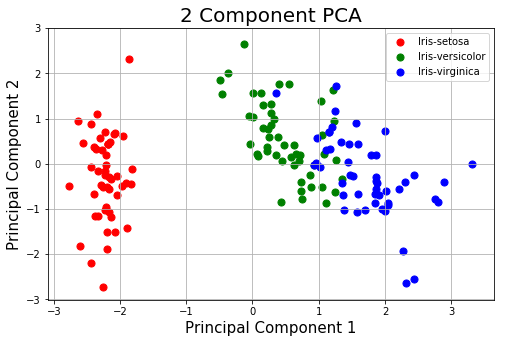

In [17]:
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#### Alternatively,

In [18]:
pca = PCA(n_components=2)

In [19]:
principalComponents = pca.fit_transform(X_std)

In [20]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [21]:
principalDf.head(5)

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [22]:
finalDf = pd.concat([principalDf, finalDf[['species']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


Together, the first two principal components contain 95.80% of the information. The first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance.
The third and fourth principal component contained the rest of the variance of the datase

.

# III. PCA to Speed-up Machine Learning Algorithms

### 1. Download and Load the Data

In [23]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

ConnectionResetError: [Errno 54] Connection reset by peer

In [ ]:
mnist

In [ ]:
# These are the images
import pandas as pd
mnist_df=pd.DataFrame(mnist.data).describe
mnist_df_label=pd.DataFrame(mnist.target).describe


### 2. Split Data into Training and Test Sets

In [ ]:
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

### 3. Standardize the Data

#### Importance of Feature Scaling


1. Standardization involves rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one.

2. In PCA we are interested in the components that maximize the variance. If one component (e.g. human height) varies less than another (e.g. weight) because of their respective scales (meters vs. kilos), PCA might determine that the direction of maximal variance more closely corresponds with the ‘weight’ axis, if those features are not scaled.




In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#Fit on training set only.
scaler.fit(train_img)
#Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

### 4. Import and Apply PCA

Notice the code below has .95 for the number of components parameter.
It means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.

In [ ]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

### 5. Fit PCA on training set.

In [ ]:
pca.fit(train_img)


### 6. Apply the mapping (transform) to both the training set and the test set.

In [ ]:
transformed_train_img = pca.transform(train_img)


Note: You can find out how many components PCA choose after fitting the model using pca.n_components_ .
    
     In this case, 95% of the variance amounts to n principal components.

In [ ]:
print(pca.n_components_)

In [ ]:
print(pca.explained_variance_)

In [ ]:
print(pca.explained_variance_ratio_)

In [ ]:
cum=pca.explained_variance_ratio_.cumsum()
print(pca.explained_variance_ratio_.cumsum())

In [ ]:
transformed_test_img = pca.transform(test_img)

In [ ]:
%matplotlib notebook
plt.figure(figsize=(8,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))

plt.xlim(xmax=400, xmin=0)
plt.ylim(ymax = 100, ymin = 1)

plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')

# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.legend(loc='best')
plt.show()



The idea with going from 784 components to 330 is to reduce the running time of a supervised learning algorithm (in this case logistic regression) which we will see at the end of the tutorial. One of the cool things about PCA is that we can go from a compressed representation (330 components) back to an approximation of the original high dimensional data (784 components).

### 7. Apply Logistic Regression to the Transformed Data

#### Step 1: Import the model you want to use



In [ ]:
from sklearn.linear_model import LogisticRegression

#### Step 2: Make an instance of the Model.

In [ ]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'

logisticRegr = LogisticRegression(solver = 'lbfgs')#Limited Memory Broyden–Fletcher–Goldfarb–Shanno

logisticRegr_pca=LogisticRegression(solver = 'lbfgs')

In numerical optimization, the Broyden–Fletcher–Goldfarb–Shanno (BFGS) algorithm is an iterative method for solving unconstrained nonlinear optimization problems.


#### Step 3: Training the model on the data, storing the information learned from the data

In [ ]:
#fitting logistic regression for original data
logisticRegr.fit(train_img, train_lbl)

In [ ]:
#fitting logistic regression for pca_transformed data
logisticRegr_pca.fit(transformed_train_img, train_lbl)

#### Step 4: Predict the labels of new data (new images)

Uses the information the model learned during the model training process

The code below predicts for one observation

In [ ]:
# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))

In [ ]:
logisticRegr_pca.predict(transformed_test_img[0].reshape(1,-1))

The code below predicts for multiple observations at once

In [ ]:
# Predict for One Observation (image)
logisticRegr.predict(test_img[0:10])

In [ ]:
logisticRegr_pca.predict(transformed_test_img[0:10])

In [ ]:
print(test_lbl[0:10])

### 8. Measuring Model Performance

#### SPEED COMPARISION

In [ ]:
import datetime
a = datetime.datetime.now()
logisticRegr.fit(train_img, train_lbl)
b = datetime.datetime.now() 

print("TIME TAKEN TO FIT A LOGISTIC REGRESSION MODEL ON ORIGINAL DATA = ",b-a)

In [ ]:
c= datetime.datetime.now()
logisticRegr_pca.fit(transformed_train_img, train_lbl)
d = datetime.datetime.now() 

print("TIME TAKEN TO FIT A LOGISTIC REGRESSION MODEL ON PCA TRANSFORMED DATA = ",d-c)

#### ACCURACY MEASURE FOR PCA_TRANSFORMED DATA AND ORIGINAL DATA
Though Accuracy is not always the best measure to evaluate performance of the model, we are using it here just for tthe simplicity.

In [ ]:
#Accuracy with the original data
logisticRegr.score(test_img, test_lbl)

In [ ]:
#Accuracy with the pca_transformed data
logisticRegr_pca.score(transformed_test_img, test_lbl)

## Image reconstruction

The idea with going from 784 components to 330 is to reduce the running time of a supervised learning algorithm (in this case logistic regression) which we will see at the end of the tutorial. One of the cool things about PCA is that we can go from a compressed representation (154 components) back to an approximation of the original high dimensional data (784 components)

In [ ]:
lower_dimensional_data = pca.fit_transform(mnist.data)
approximation = pca.inverse_transform(lower_dimensional_data)
plt.figure(figsize=(8,4));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(mnist.data[1].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 154 principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation[1].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('330 components', fontsize = 14)
plt.title('95% of Explained Variance', fontsize = 20);